__IBM HR Analytics Employee Attriton__

first we import the data csv file in the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- In Above columns , No. in Education mean

1 - 'Below College'

2 - 'College'

3 - 'Bachelor' 

4 - 'Master'
 
5 - 'Doctor'

- And other means,


1 - 'Low'

2 - 'Medium'

3 - 'High'

4 - 'Very high'

In [3]:
data.shape

(1470, 35)

- There will be 35 columns and 1470 rows.

__Now we check Numbers of duplicated data__

In [4]:
print(f'NUmber of Duplicated data : {data.duplicated().sum()}')

NUmber of Duplicated data : 0


__Check Missing Values__

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


__Attrition Rate__

In [8]:
round((data['Attrition'].value_counts(normalize=True)*100),2)

Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

Here  the attriton rate will be show , now we visualize this,

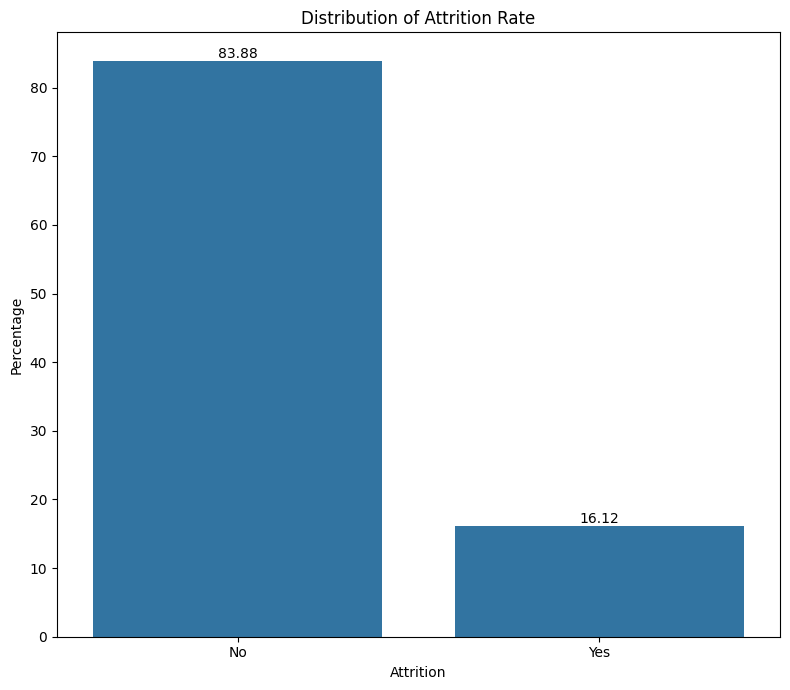

In [9]:
attrition = data['Attrition'].value_counts(normalize=True)*100
plt.figure(figsize=(8,7))
ax = sns.barplot(x=attrition.index, y=attrition)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',(p.get_x() + p.get_width() / 2.,
                                            p.get_height()),ha='center', va='bottom')
plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


- Based on analysis, the company attriton rate is 16.12%.
That mean 16.12% of employee decided to leave the company.

__Now we check the Avg tenure__

In [10]:
print(f'Averege Tenure of Employee in Company is {data["YearsAtCompany"].mean():.2f} Years')

Averege Tenure of Employee in Company is 7.01 Years


- There Avg Tenure is 7.01 years. with this Avg Tenure ,it can be concluded that many employees feel comfortable and have been with company for a long time.

__Employees Demographics__

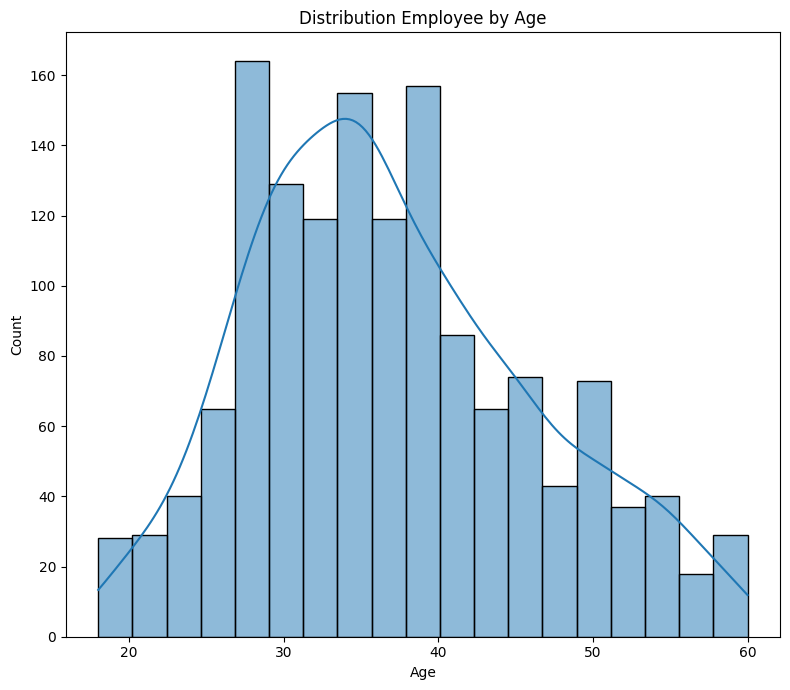

In [11]:
plt.figure(figsize=(8,7))
sns.histplot(data=data, x='Age', kde=True,)
plt.title('Distribution Employee by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Most of the company employees are in the 28-40 age group.This indicates that the company has many employees who are experinced age.

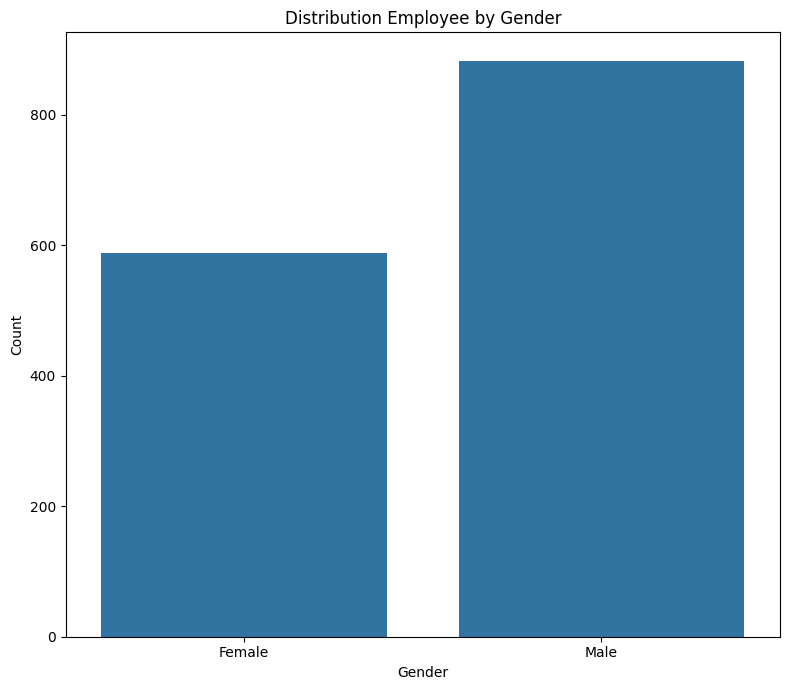

In [12]:
plt.figure(figsize=(8,7))
sns.countplot(data=data, x='Gender')
plt.title('Distribution Employee by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The majority of employees at this company are male, There are significantly more male employees than female employees.

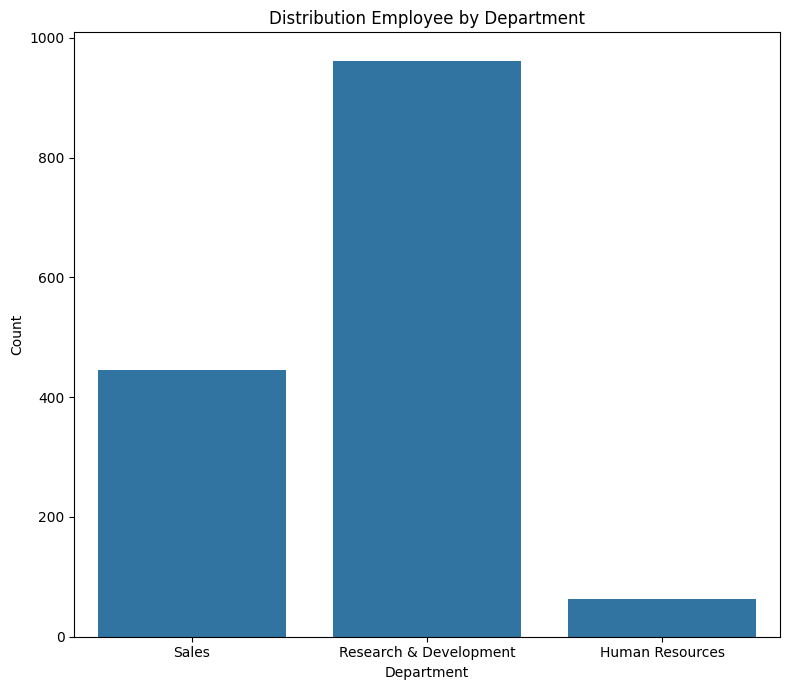

In [13]:
plt.figure(figsize=(8,7))
sns.countplot(data=data, x='Department')
plt.title('Distribution Employee by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Most of the comapny's employees are concentrated in Research & Development Department. This Indicates that company is focused on product or service research and development activities. 

In [14]:
df_attrition = data[data['Attrition']=='Yes']
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


- This Will be new df_attrition table of 235 rows , where Attrition will be 'yes'.

In [15]:
def calculate_attrition_rate(data, column):
    attrition_counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

Text(0, 0.5, 'Density')

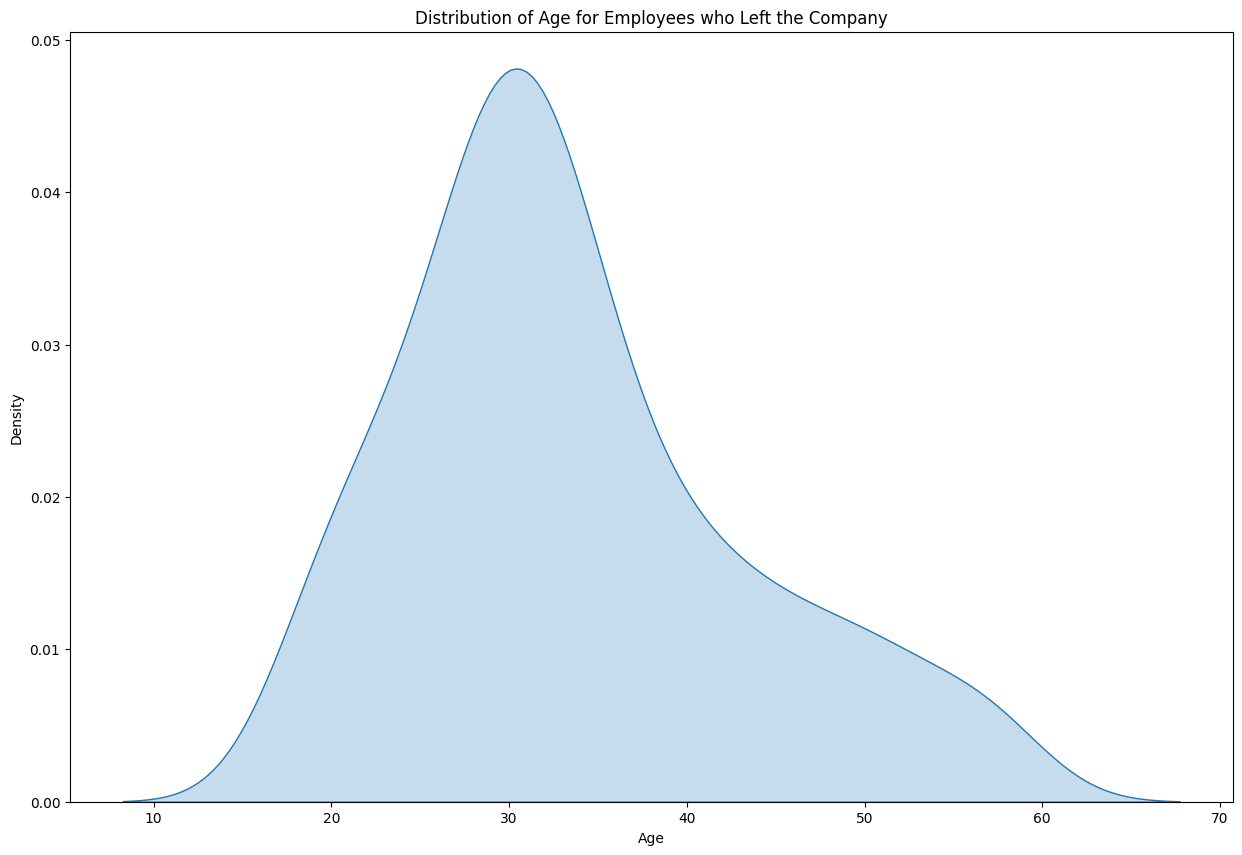

In [16]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=df_attrition, x='Age', fill=True)
plt.title('Distribution of Age for Employees who Left the Company')
plt.xlabel('Age')
plt.ylabel('Density')

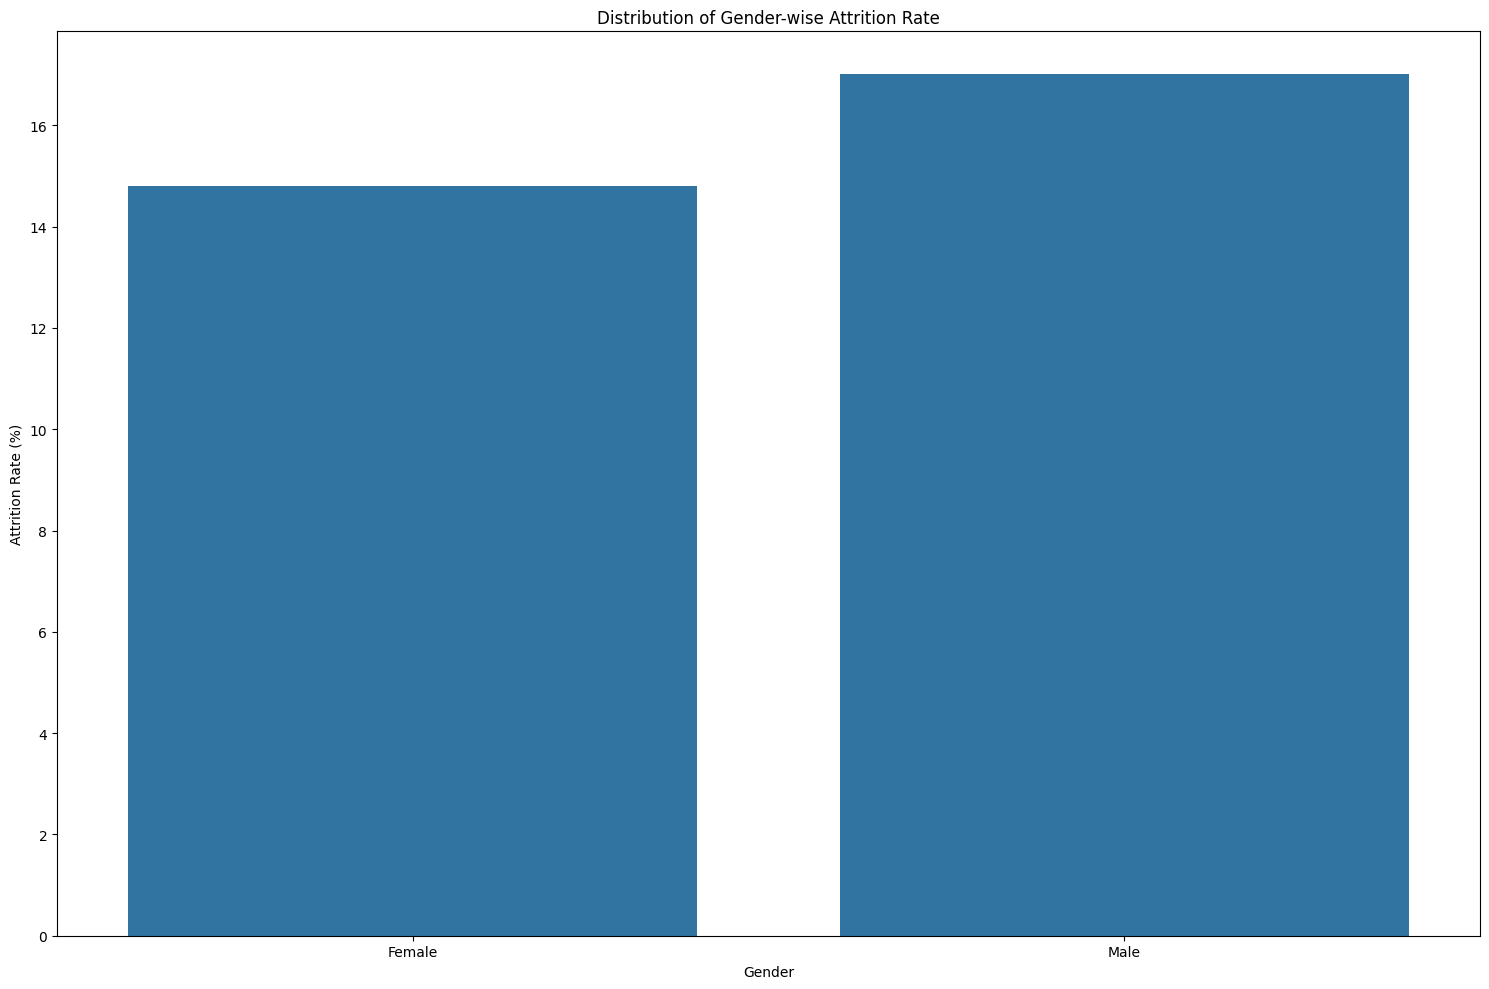

In [17]:
# Calculate attrition rate by Gender
gender_attrition_rate = calculate_attrition_rate(data, 'Gender')

plt.figure(figsize=(15,10))
sns.barplot(data=gender_attrition_rate, x='Gender', y='AttritionRate')
plt.title('Distribution of Gender-wise Attrition Rate')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Density')

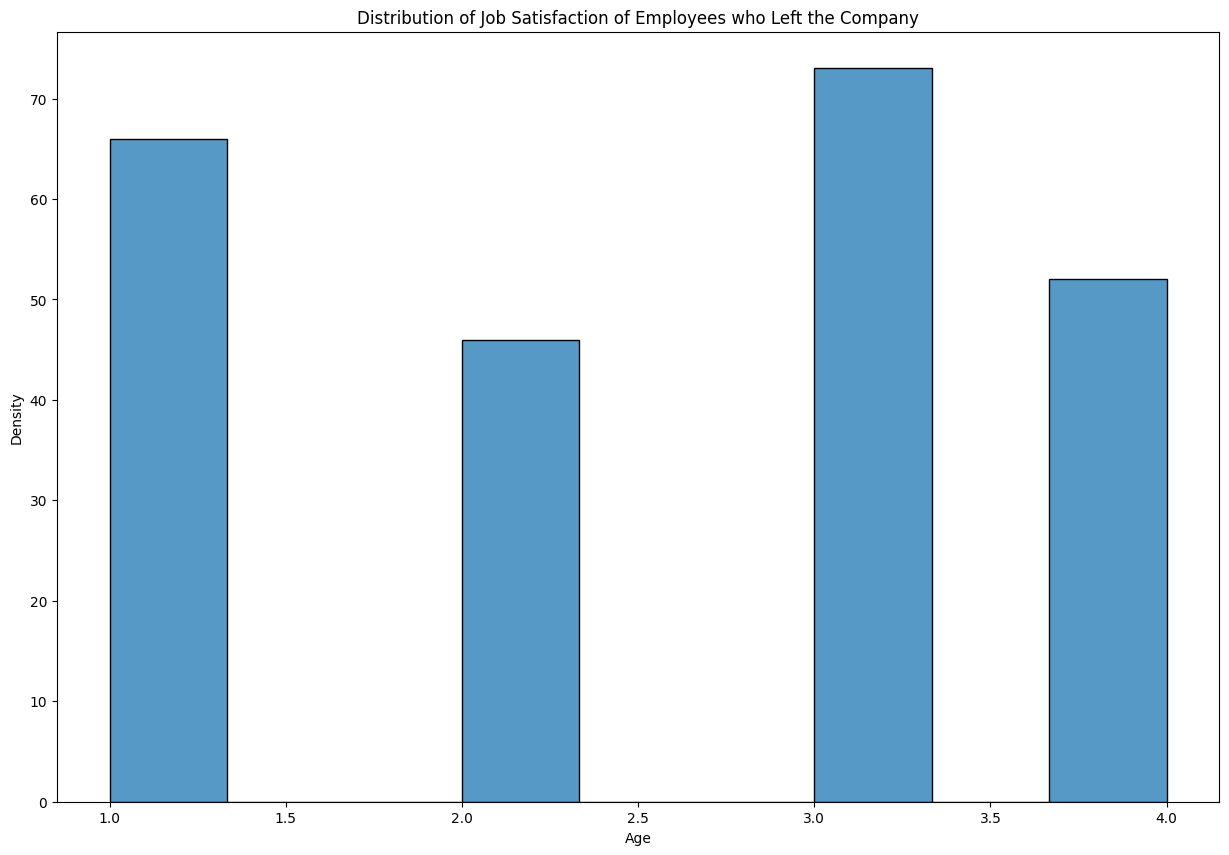

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_attrition, x='JobSatisfaction')
plt.title('Distribution of Job Satisfaction of Employees who Left the Company')
plt.xlabel('Age')
plt.ylabel('Density')

- here not any role of job satisaction in attrition in the company.

- At the age of 30 Attrition rate will be high as comaprission to other age group.

- At the Gender , Both will approx same to each other , but Male Attrition is higher then the Female Atrrition.

__Role of Salary__

C:\Users\ayush\AppData\Local\Temp\ipykernel_3552\957470536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


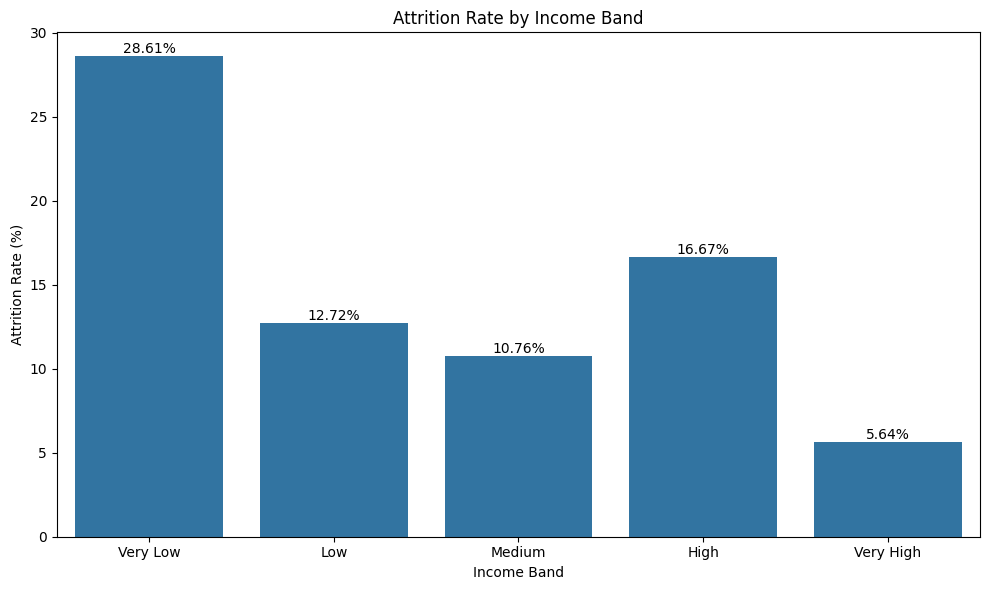

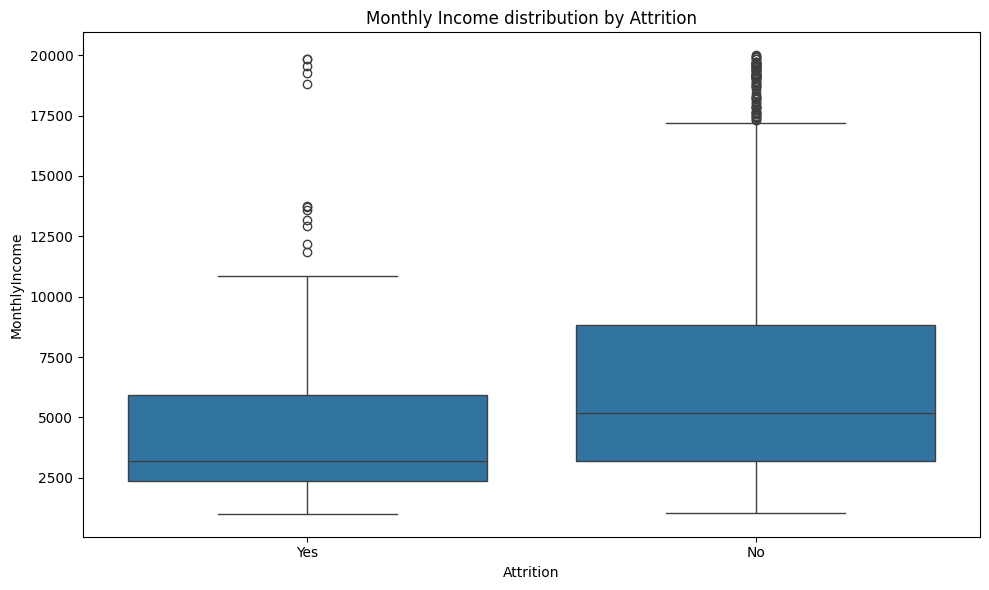

In [19]:
# create income bands (adjust edges/labels as needed)
edges = [0, 3000, 6000, 9000, 12000, data['MonthlyIncome'].max()+1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['IncomeBand'] = pd.cut(data['MonthlyIncome'], bins=edges, labels=labels, include_lowest=True)

# compute attrition rate per band
income_attrition = calculate_attrition_rate(data, 'IncomeBand')

# plot bar chart with annotations
plt.figure(figsize=(10,6))
ax = sns.barplot(data=income_attrition, x='IncomeBand', y='AttritionRate', order=labels)
ax.set_title('Attrition Rate by Income Band')
ax.set_xlabel('Income Band')
ax.set_ylabel('Attrition Rate (%)')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

# complementary views: boxplot of MonthlyIncome by Attrition and mean incomes
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income distribution by Attrition')
plt.tight_layout()
plt.show()

- As Comparision in income band by 5 level . very low, low , medium, high , very high.

- At the Very low band , the Attrition percent will be high at 28.61%.

- And At very high band , the Attrition rate percent is less which is 5.64%.

Group stats (count, mean, median, std):
           count     mean  median      std
Attrition                                 
No          1233  6832.74  5204.0  4818.21
Yes          237  4787.09  3202.0  3640.21

Shapiro normality p-values:
Yes 1.5025414983521328e-17
No 4.220031262351636e-23

Welch t-test: t = -7.483, p = 0.0000
Mann-Whitney U: stat = 100620.500, p = 0.0000
Cohen's d (Yes - No): -0.440
Point-biserial r = -0.160, p = 0.0000

                  Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
const         -0.929109  0.129202 -7.191107  6.426821e-13 -1.182341 -0.675877
MonthlyIncome -0.000127  0.000022 -5.879297  4.120115e-09 -0.000169 -0.000085

Odds ratios:
const            0.3949
MonthlyIncome    0.9999
dtype: float64


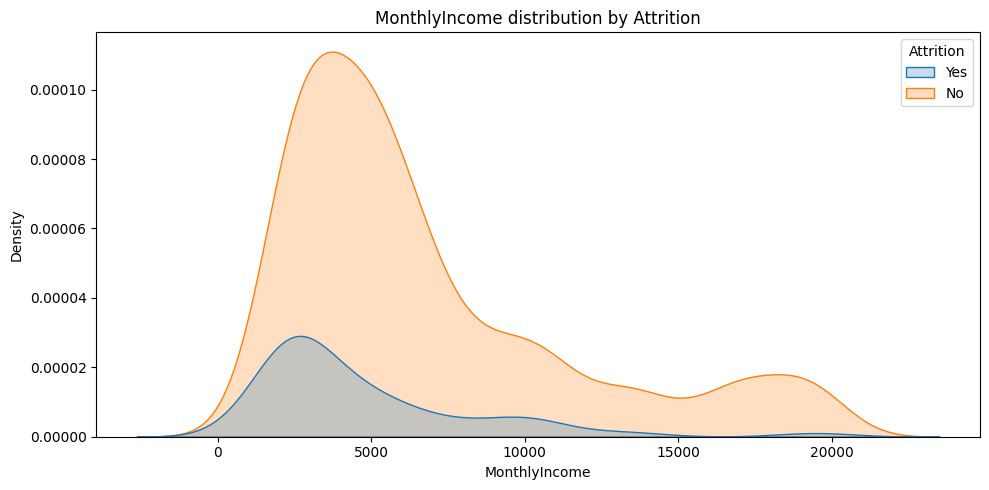

In [20]:
# Analyze role of MonthlyIncome in attrition: means, tests, effect size, logistic regression, plots
import numpy as np
from scipy import stats
import statsmodels.api as sm

# prepare data
data = data.copy()
data = data.dropna(subset=['MonthlyIncome', 'Attrition'])
y_bin = (data['Attrition'] == 'Yes').astype(int)
x = data['MonthlyIncome']

# Group stats
print("Group stats (count, mean, median, std):")
print(data.groupby('Attrition')['MonthlyIncome'].agg(['count','mean','median','std']).round(2))
print()

# Normality quick check (Shapiro on each group - small samples only)
print("Shapiro normality p-values:")
for label in ['Yes','No']:
    grp = data.loc[data['Attrition']==label, 'MonthlyIncome']
    print(label, stats.shapiro(grp.sample(min(len(grp),500), random_state=0))[1])
print()

# Two-sample test (Welch t-test) and non-parametric check
yes_income = data.loc[data['Attrition']=='Yes', 'MonthlyIncome']
no_income  = data.loc[data['Attrition']=='No',  'MonthlyIncome']
tstat, tp = stats.ttest_ind(yes_income, no_income, equal_var=False, nan_policy='omit')
mw_stat, mw_p = stats.mannwhitneyu(yes_income, no_income, alternative='two-sided')
print(f"Welch t-test: t = {tstat:.3f}, p = {tp:.4f}")
print(f"Mann-Whitney U: stat = {mw_stat:.3f}, p = {mw_p:.4f}")

# Cohen's d (effect size)
def cohens_d(a,b):
    na, nb = len(a), len(b)
    sa, sb = a.std(ddof=1), b.std(ddof=1)
    pooled = np.sqrt(((na-1)*sa**2 + (nb-1)*sb**2) / (na+nb-2))
    return (a.mean() - b.mean()) / pooled
print(f"Cohen's d (Yes - No): {cohens_d(yes_income, no_income):.3f}")

# Point-biserial correlation
try:
    from scipy.stats import pointbiserialr
    r, r_p = pointbiserialr(y_bin, x)
    print(f"Point-biserial r = {r:.3f}, p = {r_p:.4f}")
except Exception:
    pass

# Simple logistic regression (MonthlyIncome -> Attrition)
X = sm.add_constant(data[['MonthlyIncome']])
model = sm.Logit(y_bin, X).fit(disp=False)
print()
print(model.summary2().tables[1])
odds_ratio = np.exp(model.params)
print("\nOdds ratios:")
print(odds_ratio.round(4))
plt.figure(figsize=(10,5))
sns.kdeplot(data=data, x='MonthlyIncome', hue='Attrition', fill=True)
plt.title('MonthlyIncome distribution by Attrition')
plt.tight_layout()
plt.show()



- Here Attrition Line show Monthly Income has More role in the Attrition .

- Who's Monthly income is less then the 10,000 Are left the company.

__Conclusion :-__ 


- Main factor will be salary in the attrition, many employees have very less salary .

- if they got hike in their Salary percentage and perk , Then the Attrition can be less .

- Many employees leave the company around the age of 30.

- If the company involved the employee in their specific role which they work without any Workload then there Will be chance of attrition can be less.